In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
dataset=pd.read_csv('Datasets/cleaned_data2.csv')

In [3]:
dataset.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,captial_gain,capital_loss,hours_per_week,native_country,income
0,39.0,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50.0,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38.0,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53.0,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28.0,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


In [4]:
df1=dataset.copy()

In [6]:
## Creating a new feature capital income from capital_gain and capital_loss
df1['capital_income']=df1['captial_gain']-df1['capital_loss']

In [8]:
df1.drop(['captial_gain','capital_loss'],axis=1,inplace=True)
df1.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,hours_per_week,native_country,income,capital_income
0,39.0,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,40.0,United-States,<=50K,2174.0
1,50.0,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,13.0,United-States,<=50K,0.0
2,38.0,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,40.0,United-States,<=50K,0.0
3,53.0,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40.0,United-States,<=50K,0.0
4,28.0,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40.0,Cuba,<=50K,0.0


In [10]:
numerical_features=[feature for feature in df1.columns if df1[feature].dtype !='O']
catergorical_features=[feature for feature in df1.columns if feature not in numerical_features]

print(f'Numerical features  {numerical_features}')
print(f'Numerical features  {catergorical_features}')

Numerical features  ['age', 'fnlwgt', 'education_num', 'hours_per_week', 'capital_income']
Numerical features  ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'income']


In [12]:
sns.set(rc={"figure.figsize":(15,8)})

<AxesSubplot:>

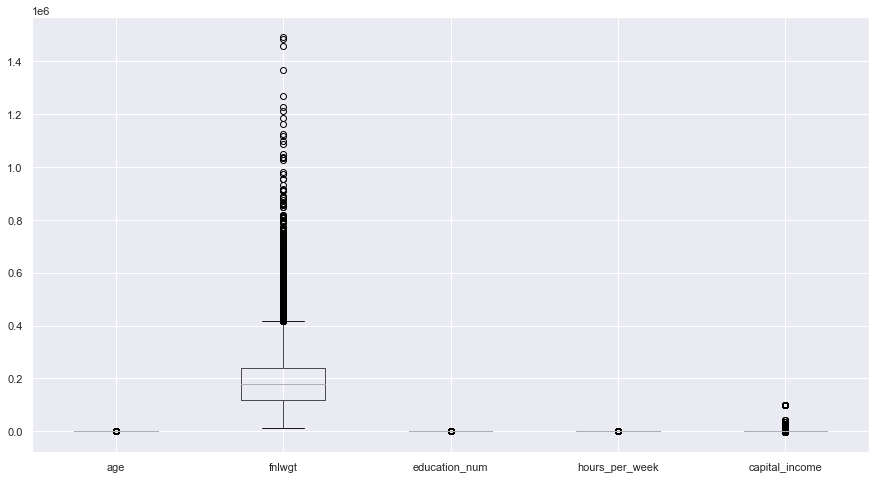

In [35]:
df1[numerical_features].boxplot()

In [14]:
df2=df1.copy()

In [32]:
def comparison_plot(df1,df2,column):
    
    plt.figure(figsize=(16,8))
    plt.title('Before and After handling outliers')
    plt.subplot(2,2,1)
    
    sns.distplot(df1[column])

    plt.subplot(2,2,2)
    sns.boxplot(df1[column])
    
    plt.subplot(2,2,3)
    sns.distplot(df2[column])

    plt.subplot(2,2,4)
    sns.boxplot(df2[column])

    plt.show()

In [39]:
def handle_outliers(df2,feature):
    q1,q3=df2[feature].quantile([.10,.90])
    iqr=q3-q1
    lower_limit=q1-1.5*iqr
    higher_limit=q3+1.5*iqr
    print('Upper limit',higher_limit)
    print('lower limit',lower_limit)
    df2[feature]=np.where(df2[feature]>higher_limit,higher_limit,np.where(df2[feature]<lower_limit,lower_limit,df2[feature]))

Upper limit 112.0
lower limit -32.0


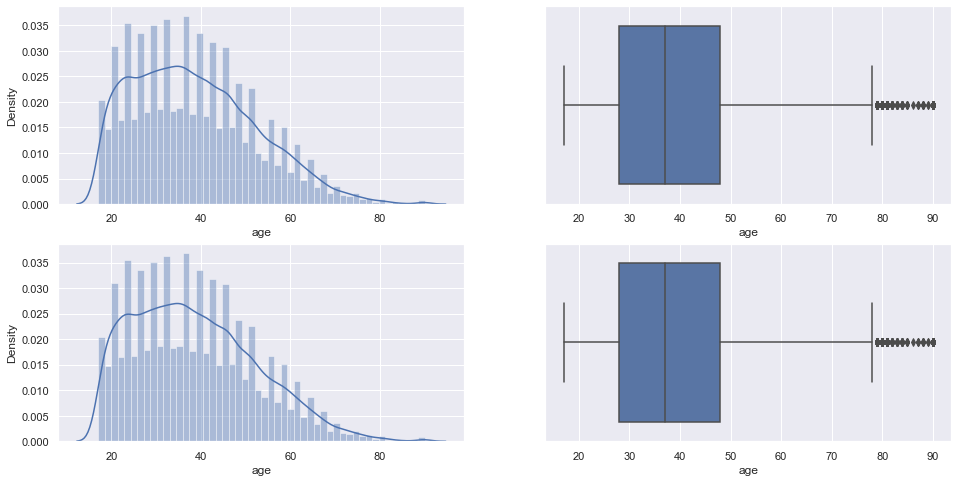

Upper limit 722496.8
lower limit -328252.00000000006


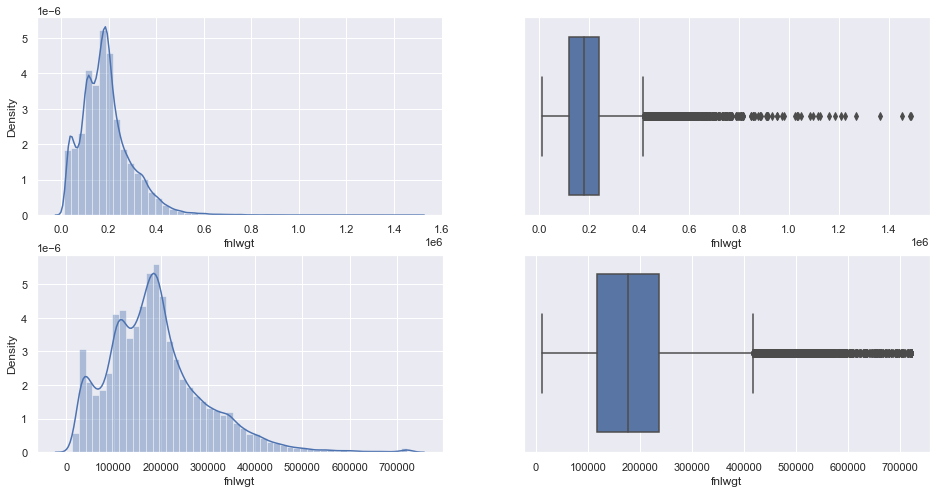

Upper limit 22.0
lower limit -2.0


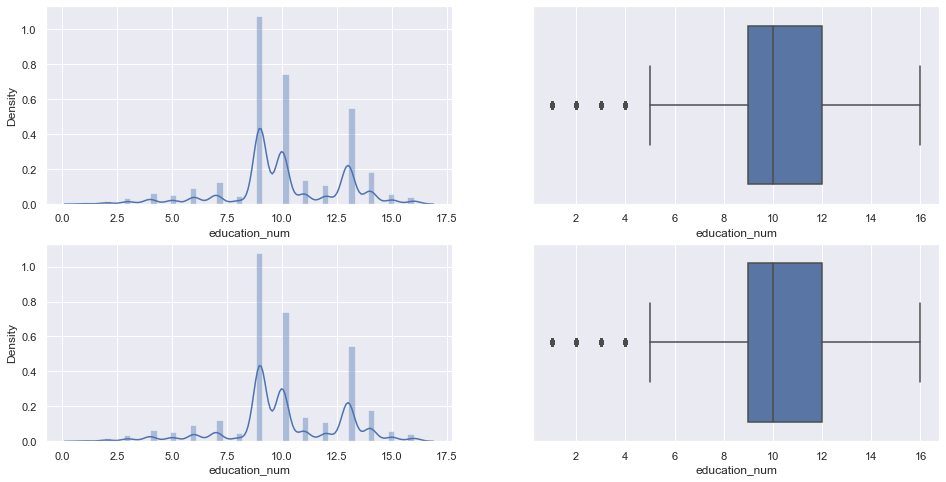

Upper limit 101.5
lower limit -22.5


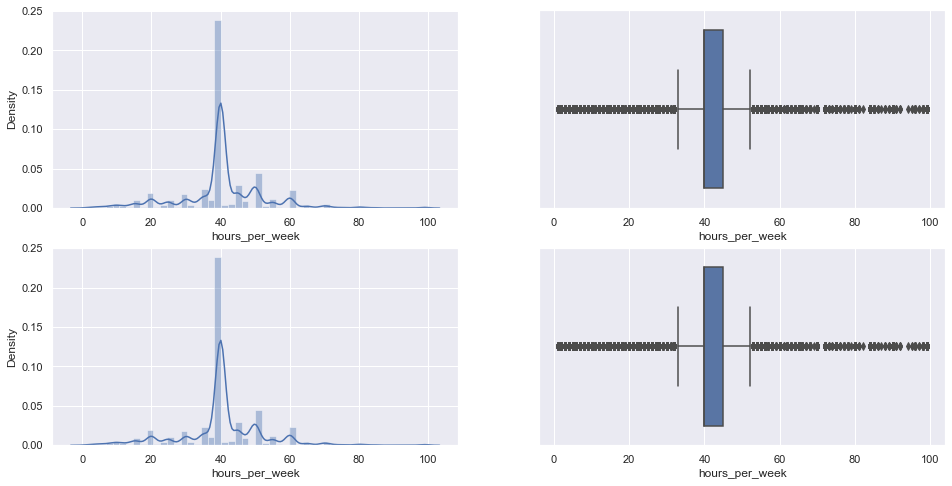

Upper limit 0.0
lower limit 0.0


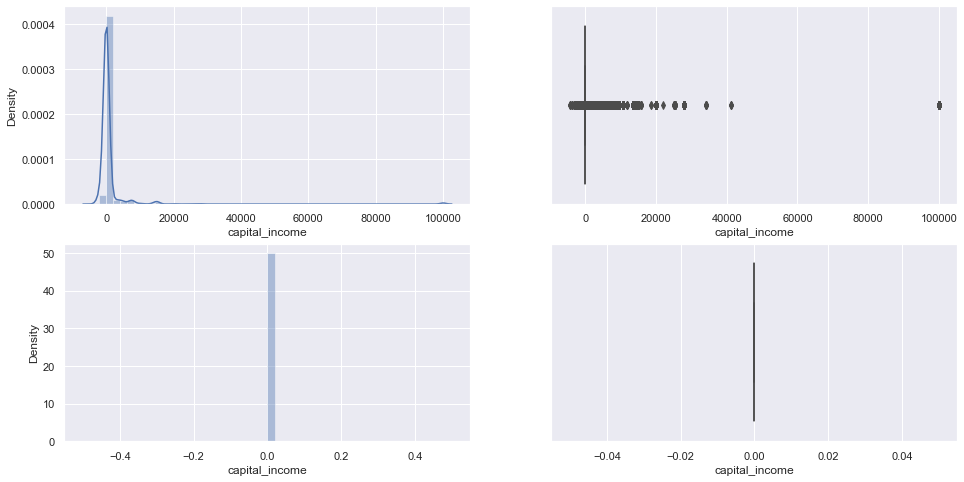

In [33]:
for feature in numerical_features:
    handle_outliers(df2,feature)
    comparison_plot(df1,df2,feature)

- outliers are there in other features and not removed properly
- when we tried to remove the outliers in capital_income values are handled with 0 in the limits

<AxesSubplot:>

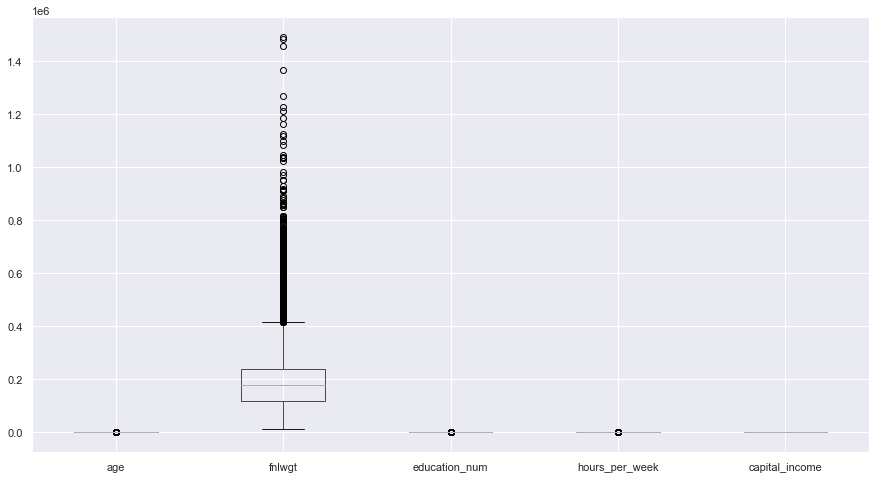

In [43]:
df2[numerical_features].boxplot()

In [45]:
def handle_outliers1(df2,feature):
    q1,q3=df2[feature].quantile([.25,.75])
    iqr=q3-q1
    lower_limit=q1-1.5*iqr
    higher_limit=q3+1.5*iqr
    print('Upper limit',higher_limit)
    print('lower limit',lower_limit)
    df2[feature]=np.where(df2[feature]>higher_limit,higher_limit,np.where(df2[feature]<lower_limit,lower_limit,df2[feature]))

In [49]:
df2=df1.copy()

Upper limit 78.0
lower limit -2.0


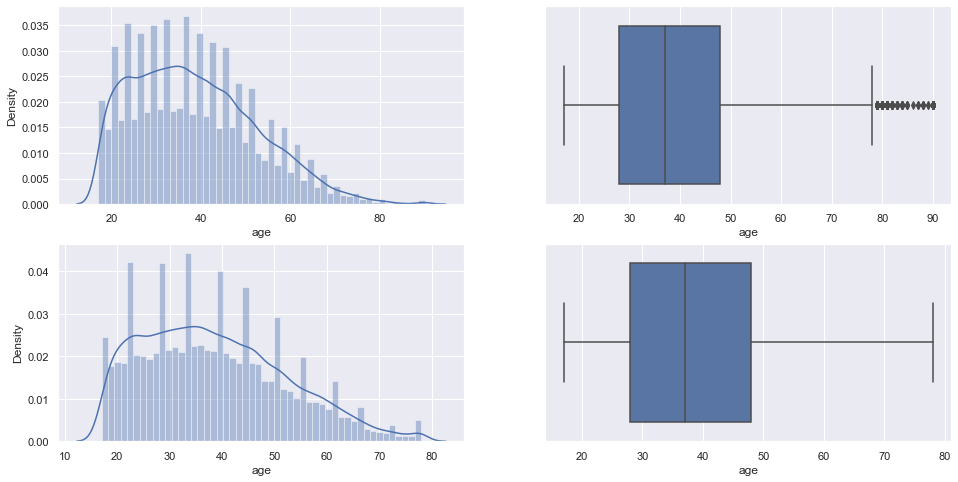

Upper limit 417717.5
lower limit -62542.5


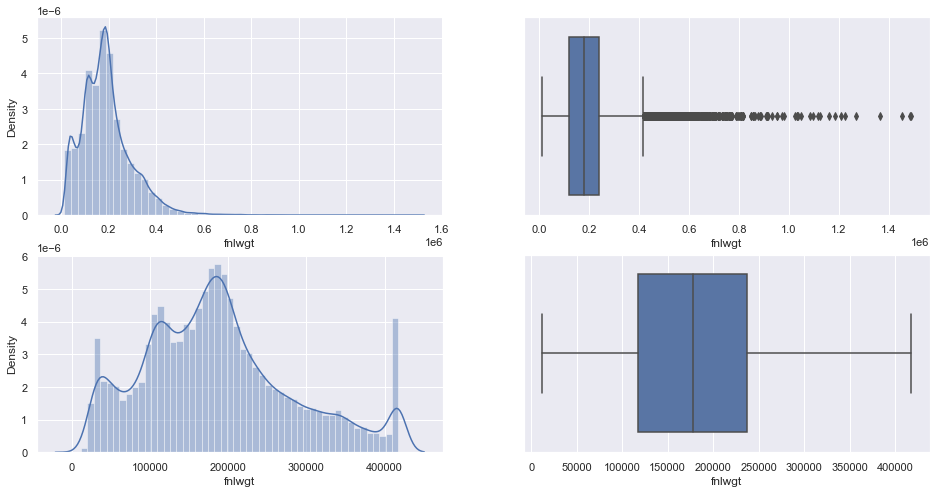

Upper limit 16.5
lower limit 4.5


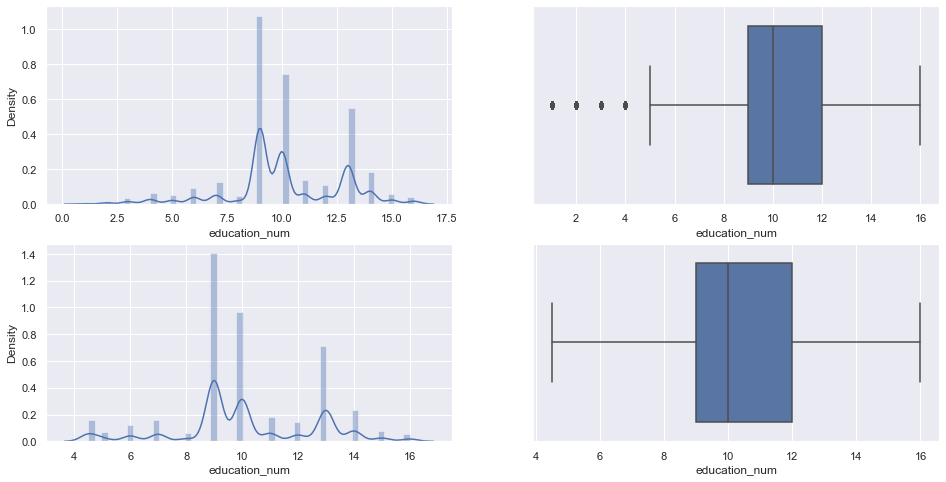

Upper limit 52.5
lower limit 32.5


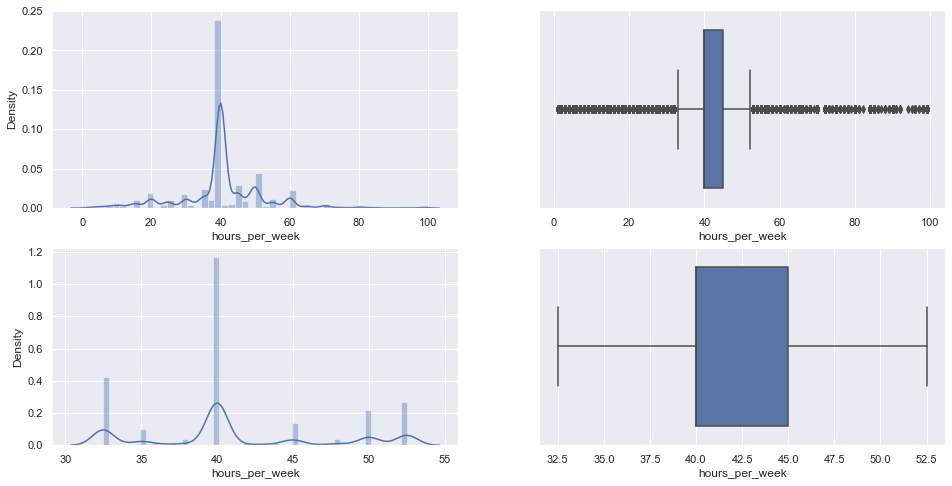

In [50]:
for feature in numerical_features[:-1]:
    handle_outliers1(df2,feature)
    comparison_plot(df1,df2,feature)

<AxesSubplot:>

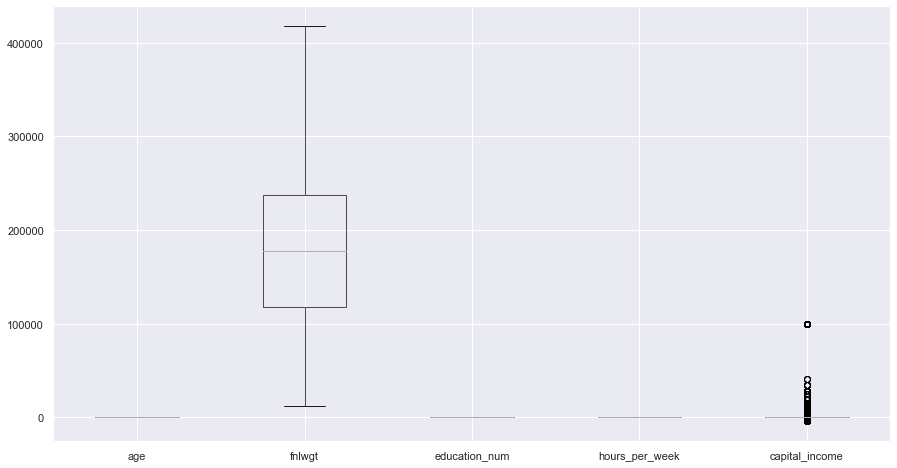

In [51]:
df2[numerical_features].boxplot()

In [53]:
df2.to_csv('Datasets/outlier_handled',index=False)